In [1]:
import os
# Prevenção de vazamento de memória do MKL no Windows
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 
import numpy as np # Importa numpy para um pequeno ajuste nos dados



In [3]:
# 1. Geração de Dados Sintéticos de Clientes
# Definimos 4 centros para 4 perfis de cliente
# cluster_std controla a dispersão dos dados em cada perfil.
X, y_true = make_blobs(
    n_samples=400, 
    centers=4, 
    cluster_std=1.5, 
    random_state=42
)

In [4]:
# Garantimos que os valores sejam positivos e ajustamos as escalas.
# Atributo 1: Renda Anual (em milhares)
X[:, 0] = np.abs(X[:, 0] * 10 + 50) 
# Atributo 2: Frequência de Compra (Número de Compras/Ano)
X[:, 1] = np.abs(X[:, 1] * 5 + 10)



In [5]:
# 2. Treinamento do Modelo K-Means
# Buscamos os 4 perfis (clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


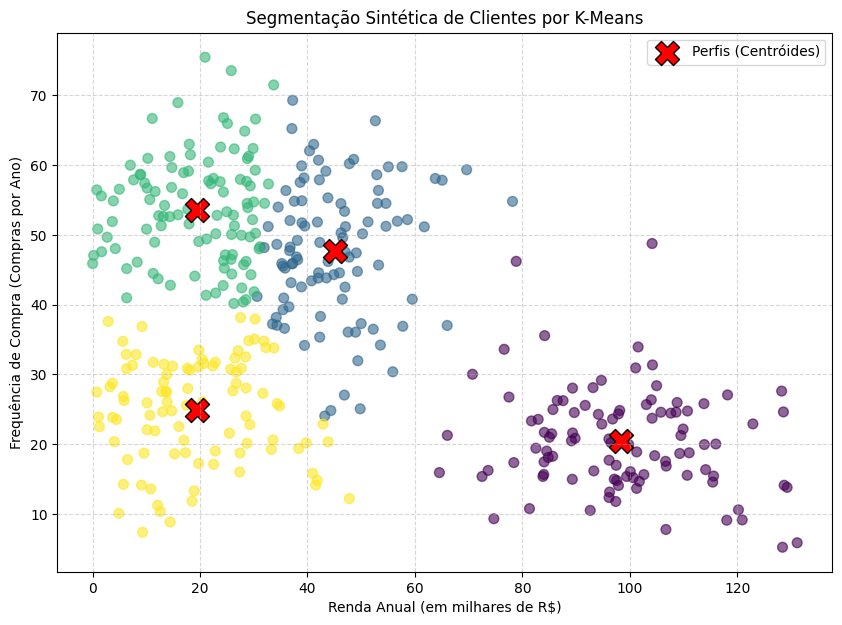

In [6]:
# 3. Visualização dos Perfis Encontrados
plt.figure(figsize=(10, 7))

# Plota os clientes, colorindo-os pelo perfil (cluster) encontrado
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, alpha=0.6)
# Plota os centros de cada perfil
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=300, label="Perfis (Centróides)", edgecolors='black')

plt.title("Segmentação Sintética de Clientes por K-Means")
plt.xlabel("Renda Anual (em milhares de R$)")
plt.ylabel("Frequência de Compra (Compras por Ano)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



In [7]:
# 4. Análise dos Perfis (O que o K-Means Encontrou)
print("\n--- Centróides dos Perfis de Cliente Encontrados ---")
# Para entender o que cada cluster representa, analisamos o valor médio (centróide)
# que o K-Means calculou para a Renda e a Frequência de cada um dos 4 perfis.
for i, (renda, frequencia) in enumerate(centroids):
    print(f"Perfil {i+1}: Renda Média ≈ R$ {renda:.2f} mil | Frequência Média ≈ {frequencia:.2f} Compras/Ano")


--- Centróides dos Perfis de Cliente Encontrados ---
Perfil 1: Renda Média ≈ R$ 98.32 mil | Frequência Média ≈ 20.49 Compras/Ano
Perfil 2: Renda Média ≈ R$ 45.10 mil | Frequência Média ≈ 47.71 Compras/Ano
Perfil 3: Renda Média ≈ R$ 19.36 mil | Frequência Média ≈ 53.59 Compras/Ano
Perfil 4: Renda Média ≈ R$ 19.40 mil | Frequência Média ≈ 24.91 Compras/Ano


In [ ]:
#Perfil 1 (Exemplo): Renda Média Alta e Frequência de Compra Baixa (Os "Compradores Esporádicos Ricos").
#Perfil 2 (Exemplo): Renda Média Baixa e Frequência de Compra Alta (Os "Compradores Frequentes com Orçamento").
#Perfil 3 (Exemplo): Renda Média Baixa e Frequência de Compra Baixa (Os "Clientes Casuais").
#Perfil 4 (Exemplo): Renda Média Alta e Frequência de Compra Alta (Os "Clientes VIP").